In [ ]:
%load_ext autoreload
%autoreload 2
from lens_simulation.Lens import Lens, LensType, GratingSettings
from lens_simulation.Medium import Medium, LithiumNiabate

from lens_simulation.structures import SimulationOptions, SimulationParameters
from lens_simulation import utils
import matplotlib.pyplot as plt

import numpy as np


In [ ]:
# create lens
parameters = SimulationParameters(
    A=10000,
    pixel_size=1e-6,
    sim_height=1000e-6,
    sim_width=1000e-6,
    sim_wavelength=488e-9,
    lens_type=LensType.Spherical,
)



In [ ]:

from lens_simulation.Lens import test_escape_path_fits_inside_simulation
from lens_simulation.Simulation import pad_simulation

ep = 0.5
lens_type = LensType.Cylindrical
lens_type = LensType.Spherical

lens = Lens(500e-6, 50e-6, 2.0, LithiumNiabate())
lens.generate_profile(parameters.pixel_size, lens_type, length=200e-6)

print("lens: ", lens.profile.shape)
plt.imshow(lens.profile, cmap="plasma")
plt.title("lens profile")
plt.show()

# aperture
lens.create_custom_aperture(100e-6, 150e-6, type="radial", inverted=False)

# truncation
lens.create_truncation_mask(truncation_height=49e-6, aperture=True)

grating_settings = GratingSettings(
    width = 25e-6,
    distance = 50e-6,
    depth = 20e-6,
    centred = True
)

lens.create_grating_mask(grating_settings, True, True)

lens.apply_masks(grating=True, truncation=True)

# escape path
lens.create_escape_path(parameters, ep)

# pad simulation
lens = pad_simulation(lens, parameters)

# apply all mask
lens.apply_aperture_masks()

fig = utils.plot_apeture_masks(lens)
plt.show()

fig = utils.plot_lens_modifications(lens)
plt.show()



# TODO: add escape path to config


In [ ]:
test_escape_path_fits_inside_simulation(lens, parameters, ep=0.1)
test_escape_path_fits_inside_simulation(lens, parameters, ep=0.5)
test_escape_path_fits_inside_simulation(lens, parameters, ep=1.5)

In [ ]:
from lens_simulation import utils, validation
from lens_simulation.Lens import Lens, generate_lens, LensType
from lens_simulation.Medium import LithiumNiabate
from pprint import pprint

lens_config = utils.load_yaml_config("lens.yaml")

print("before validation")
pprint(lens_config)

lens_config = validation._validate_default_lens_config(lens_config)

print("after validation")
pprint(lens_config)

lens = generate_lens(lens_config, LithiumNiabate())

lens.generate_profile(1e-6)

# external pixel_size, lens_type

import matplotlib.pyplot as plt
plt.imshow(lens.profile)
plt.show()



#### Plot Slices as GIF
Plot the simulation slices as gif



In [ ]:
%load_ext autoreload
%autoreload 2
import os
from lens_simulation import utils
import glob
import imageio
import numpy as np
import matplotlib.pyplot as plt


print(os.getcwd())

path = r"\\ad.monash.edu\home\User028\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\rarely-upward-ocelot\safe-hound"

sim_path = os.path.join(path, str(0))
utils.save_propagation_gif(sim_path)

sim_path = os.path.join(path, str(1))
utils.save_propagation_gif(sim_path)


In [ ]:

# stack slices
sim_path = os.path.join(path, str(1))

utils.save_propagation_slices_gif(sim_path)

In [ ]:

print(sim_path)

filenames = sorted(glob.glob(os.path.join(sim_path, "*mm.npy")))

# TODO: might not be possible for very large sims to load full sim, 
# will need to come up with another way to load slices in right format

# sim = None
# print(f"{len(filenames)} slices.")

# vslice = None
# hslice = None


# for i each dim in slice (301)
    # for each j slice (58)
        # get slice column
        # set to vslice arr column
        # vslice[j, i] = slice[i,]

# slice = np.load(filenames[0])
# vslice = np.zeros(shape=(len(filenames), slice.shape[0]))


# for i in range(slice.shape[0]):
#     for j, fname in enumerate(filenames):

#         slice = np.load(fname)
        
#         vslice[j, i] = slice[i, :] 

#         print(f"{i}, {j}")
#         print(f"fname: {os.path.basename(fname)}")
#         print(f"shape: {slice.shape}")
#         print(f"vslice: {vslice.shape})")
#         # print(f"hslice: {hslice.shape})")
    




### Simulation Data Aggregation


In [ ]:
import os
import glob


directory = r"//ad.monash.edu/home/User028/pcle0002/Documents/repos/lens_simulation/src/lens_simulation/log/rarely-upward-ocelot"

sim_run_name = os.path.basename(directory)

sim_directories = [path for path in os.listdir(directory) if os.path.isdir(os.path.join(directory, path))] 

print("directory: ", directory)
print("sim_run_name: ", sim_run_name)
print("sim_dir: ", sim_directories)






In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from lens_simulation import utils
path = r"\\ad.monash.edu\home\User028\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\duly-fancy-panda\sweet-mako"

pd.set_option("display.max_rows", None, "display.max_columns", None)

# df_join = load_simulation_data(path)

print(f"path: {path}")
from pprint import pprint

# print("stages: ")
# display(df_stages)

# print("lens: ")
# display(df_lens)


# print("beam: ")
# display(df_beam)


print("join")
# display(df_join)



In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from lens_simulation import utils
# path = r"\\ad.monash.edu\home\User028\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\duly-fancy-panda\sweet-mako"
pd.set_option("display.max_rows", None, "display.max_columns", None)

directory = r"\\ad.monash.edu\home\User028\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\barely-ideal-zebra"
directory = r"\\ad.monash.edu\home\User028\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\lively-vital-duck"


df = utils.load_run_simulation_data(directory)

print(f"run: {os.path.basename(directory)}")
display(df.T)


df.to_csv("data.csv")

In [ ]:
display(df[df["exponent"] ==  2.1].T)


In [ ]:
%load_ext autoreload
%autoreload 2

import lens_simulation
from lens_simulation import utils
from pprint import pprint
import matplotlib.pyplot as plt
from lens_simulation.Lens import generate_lens
from lens_simulation.Medium import Medium


config = utils.load_yaml_config("config.yaml")

# pprint(config)



for stage_config in config["stages"]:

    lens_name = stage_config["lens"]

    for conf in config["lenses"]:
        if conf["name"] == lens_name:
            lens_config = conf
    print(lens_name)
    pprint(lens_config)

    lens = generate_lens(lens_config, 
                Medium(lens_config["medium"], config["sim_parameters"]["sim_wavelength"]), 
                config["sim_parameters"]["pixel_size"])

    utils.plot_lens_profile_2D(lens)
    plt.show()


## Plot Simulation Setup

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from lens_simulation import utils
from pprint import pprint

config = utils.load_yaml_config("config.yaml")

pprint(config["stages"])



fig = utils.plot_simulation_setup(config)
plt.show()


## Simulation Parameter Sweep


In [ ]:
%load_ext autoreload
%autoreload 2

from lens_simulation import utils
from pprint import pprint
from copy import deepcopy

# sweep
config = utils.load_config("config.yaml")

config["sweep"] = deepcopy(config)

pprint(config)


# config dict vs config yaml
# yaml creates the sweeps
# dicts create the objects




In [30]:
%load_ext autoreload
%autoreload 2

%load_ext autoreload 
%autoreload 2
from lens_simulation import SimulationRunner


sim_runner = SimulationRunner.SimulationRunner("sweep.yml")
# sim_runner.initialise_simulation()
sim_runner.setup_simulation()
# sim_runner.run_simulations()


2022-06-16 13:51:08,169 | root | INFO | generate_simulation_parameter_sweep:336 | Beam Configurations: 1
2022-06-16 13:51:08,174 | root | INFO | generate_simulation_parameter_sweep:337 | Lens Configurations: 6


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2022-06-16 13:51:08,181 | root | INFO | generate_simulation_parameter_sweep:338 | Stage Configurations: 1
2022-06-16 13:51:08,186 | root | INFO | generate_simulation_parameter_sweep:339 | Total Simulation Configurations: 6
2022-06-16 13:51:08,192 | root | INFO | setup_simulation:103 | Generated 6 simulation configurations.


In [7]:
%load_ext autoreload
%autoreload 2
from lens_simulation.SimulationRunner import (get_lens_configurations, generate_lens_parameter_combinations, 
    generate_beam_parameter_combinations,  get_beam_configurations, generate_stage_parameter_combination, get_stage_configurations, 
    generate_simulation_parameter_sweep)
from lens_simulation import utils
from lens_simulation.constants import LENS_SWEEPABLE_KEYS, MODIFICATION_SWEEPABLE_KEYS, BEAM_SWEEPABLE_KEYS, STAGE_SWEEPABLE_KEYS, GRATING_SWEEPABLE_KEYS, TRUNCATION_SWEEPABLE_KEYS, APERTURE_SWEEPABLE_KEYS

from pprint import pprint
import itertools
from copy import deepcopy


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# NOTE looping through the dict will not be a stable order...
# need to validate the config so all keys are present


In [25]:
config = utils.load_config("sweep.yml")
info =  {"run_id": 9999, "run_petname": "test-carry-mule", "log_dir": "log"}

simulation_configurations = generate_simulation_parameter_sweep(config, info)

Number of Beams: 1
Number of Lens: 6
Number of Stages: 1
Number of Simulations: 6


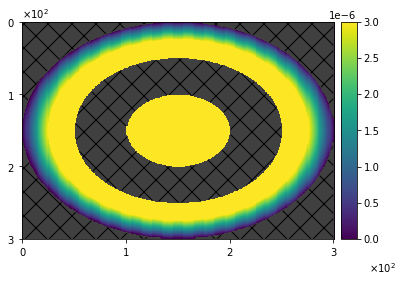

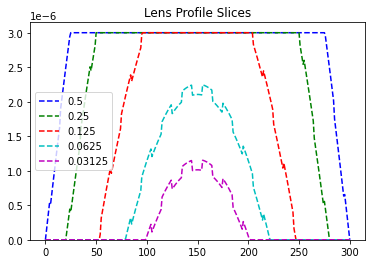

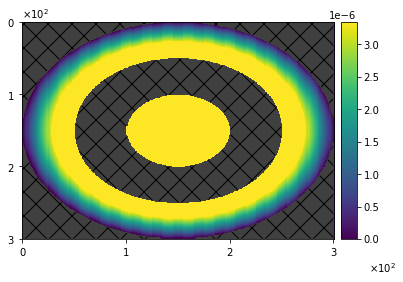

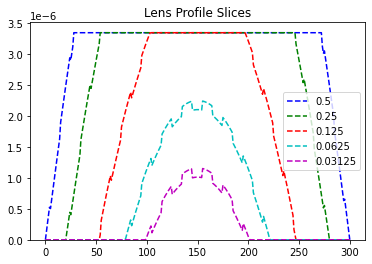

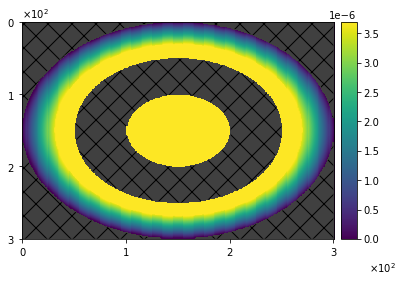

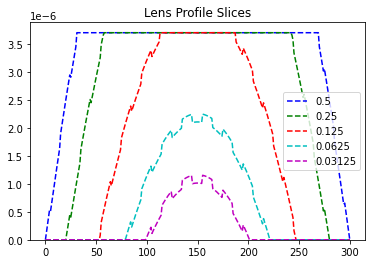

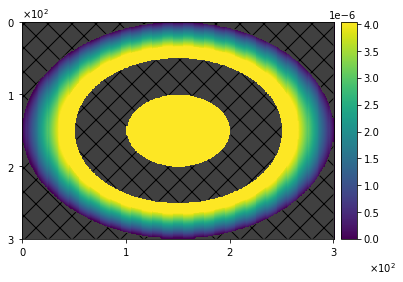

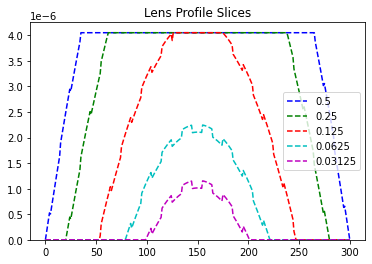

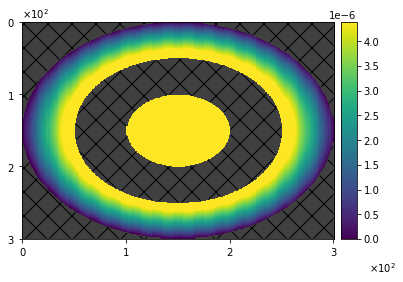

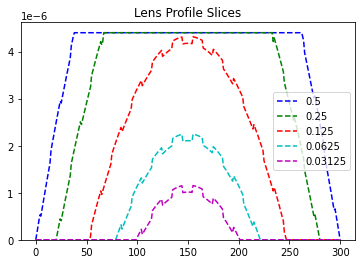

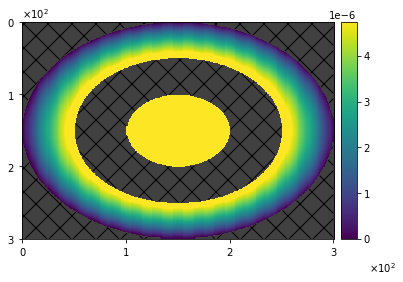

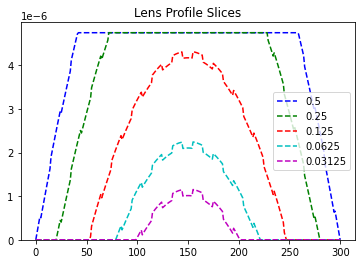

In [27]:
from lens_simulation.Lens import generate_lens
from lens_simulation.Medium import Medium
from lens_simulation import utils
import matplotlib.pyplot as plt

for conf in simulation_configurations:

    # pprint(conf)
    lc = conf["lenses"][0]
    lens = generate_lens(lc, Medium(lc["medium"]), conf["sim_parameters"]["pixel_size"])

    utils.plot_lens_profile_2D(lens)
    plt.show()

    utils.plot_lens_profile_slices(lens)
    plt.show()



In [32]:
directory = r"\\ad.monash.edu\home\User028\pcle0002\Documents\repos\lens_simulation\src\lens_simulation\log\hugely-subtle-drake"
df = utils.load_run_simulation_data(directory)

display(df.T)

,0,1,2,3,4,5,6,7,8,9,10,11
finish_distance,0.001476,0.000838,0.001476,0.000838,0.001476,0.000838,0.001476,0.000838,0.001476,0.000838,0.001476,0.000838
finish_distance_step,None,None,None,None,None,None,None,None,None,None,None,None
finish_distance_stop,None,None,None,None,None,None,None,None,None,None,None,None
focal_distance_multiple,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
focal_distance_multiple_step,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
run_id,e49a24e2-91f7-491e-825e-8b8a6b9e9e79,e49a24e2-91f7-491e-825e-8b8a6b9e9e79,e49a24e2-91f7-491e-825e-8b8a6b9e9e79,e49a24e2-91f7-491e-825e-8b8a6b9e9e79,e49a24e2-91f7-491e-825e-8b8a6b9e9e79,e49a24e2-91f7-491e-825e-8b8a6b9e9e79,e49a24e2-91f7-491e-825e-8b8a6b9e9e79,e49a24e2-91f7-491e-825e-8b8a6b9e9e79,e49a24e2-91f7-491e-825e-8b8a6b9e9e79,e49a24e2-91f7-491e-825e-8b8a6b9e9e79,e49a24e2-91f7-491e-825e-8b8a6b9e9e79,e49a24e2-91f7-491e-825e-8b8a6b9e9e79
run_petname,hugely-subtle-drake,hugely-subtle-drake,hugely-subtle-drake,hugely-subtle-drake,hugely-subtle-drake,hugely-subtle-drake,hugely-subtle-drake,hugely-subtle-drake,hugely-subtle-drake,hugely-subtle-drake,hugely-subtle-drake,hugely-subtle-drake
path,log\hugely-subtle-drake\firm-donkey,log\hugely-subtle-drake\firm-donkey,log\hugely-subtle-drake\fleet-worm,log\hugely-subtle-drake\fleet-worm,log\hugely-subtle-drake\modern-sheep,log\hugely-subtle-drake\modern-sheep,log\hugely-subtle-drake\sweet-ibex,log\hugely-subtle-drake\sweet-ibex,log\hugely-subtle-drake\unique-donkey,log\hugely-subtle-drake\unique-donkey,log\hugely-subtle-drake\up-jaguar,log\hugely-subtle-drake\up-jaguar
started,20220616.135843,20220616.135843,20220616.140049,20220616.140049,20220616.140153,20220616.140153,20220616.135946,20220616.135946,20220616.135741,20220616.135741,20220616.140252,20220616.140252
